<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/Case_Study_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Downloading kaggle dataset

# install Kaggle
!pip install kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abithathomson","key":"df5b8fd60602aad5847ef80b428122f3"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.96G/1.98G [00:15<00:00, 39.6MB/s]
100% 1.98G/1.98G [00:15<00:00, 134MB/s] 


In [10]:
!unzip -q fruit-and-vegetable-image-recognition.zip -d dataset

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [19]:
train_generator = datagen.flow_from_directory(
    '/content/dataset/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/dataset/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 3061 images belonging to 3 classes.
Found 764 images belonging to 3 classes.


In [23]:
#Build CNN Model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models

model=models.Sequential()
# first hidden layer

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
# second hidden layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# third hidden layer
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# fourth layer
#model.add(layers.Conv2D(128,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
# flatten and dense layers

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [24]:
# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# train the model

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 4/96 ━━━━━━━━━━━━━━━━━━━━ 2:59 2s/step - accuracy: 0.6348 - loss: 0.4746

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7917 - loss: 0.2114 - val_accuracy: 0.8154 - val_loss: 0.0129
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.8177 - loss: 0.0872 - val_accuracy: 0.8154 - val_loss: 0.0194
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.8279 - loss: 0.0215 - val_accuracy: 0.8154 - val_loss: 0.0210
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8241 - loss: 0.0339 - val_accuracy: 0.8154 - val_loss: 0.0273
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8064 - loss: 0.0817 - val_accuracy: 0.8154 - val_loss: 0.0087
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.8194 - loss: 0.1010 - val_accuracy: 0.8154 - val_loss: 0.0087
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8162 - loss: -0.0403 - val_accuracy: 0.8154 - val_loss: 0.0115
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.8202 - loss: 0.0431 - val_accuracy: 0.8154 - val_loss: 0

In [26]:
# Evaluate the model

test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8153 - loss: 0.0174
Test accuracy: 0.8154450058937073


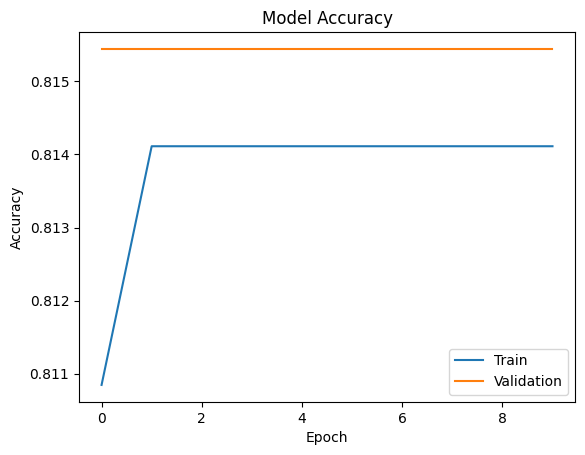

In [28]:
# plot the accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()